<a href="https://colab.research.google.com/github/sofipop/Simulaci-n_I/blob/main/Met_transformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de la Transformada Inversa
Este método va a generar una muestra aleatoria de la distribución triangular

##1.1 Librerías
- numpy para operaciones matemáticas
- matplotlib.pyplot para graficar el histograma
- random para generar los numeros aleatorios

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

##1.2 Parámetros
- a y c inicio y final del intervalo
- b es la moda

In [15]:
# Parámetros de la distribución
a = 1
b = 3
c = 5
N=10000

##1.3 Función de la Transformada inversa
Transforma los numeros aleatorios u entre [0,1] en datos que siguen la distribución triangular usando la transformada inversa.
- F_b: es el valor en b
- np.where: aplica una fórmula distinta si $u<F_b$ o si $u>=F_b$

In [16]:
# Método de la transformada inversa para distribución triangular
def inversa_triang(u, a, b, c):
  F_b = (b - a) / (c - a)
  x = np.where(u < F_b,
                a + np.sqrt(u * (b - a) * (c - a)),
                c - np.sqrt((1 - u) * (c - b) * (c - a)))
  return x

##1.4 Funcion de densidad

In [17]:
def densidad(x,a,b,c):
  f=np.zeros_like(x)
  for i,xi in enumerate(x):
    if a<=xi<=b:
      f[i]=2*(xi-a)/((b-a)*(c-a))
    elif b<xi<=c:
      f[i]=2*(c-xi)/((c-b)*(c-a))
  return f

##1.5 Generar la muestra aletoria
- n es para generar un cierto numero de numeros aleatorios
- inversa_triang() va a transformar los valores de n a datos distribuidos triangularmente

In [18]:
u=np.random.rand(N)
muestra=inversa_triang(u,a,b,c)

##1.6 Estadísticos
valores de la media y la desviacion estandar

In [19]:
# Cálculos teóricos
media_teorica = (a + b + c) / 3
desv_teorica = np.sqrt(((a**2)+(b**2)+(c**2)-(a*b)-(a*c)-(b*c)) / 18)
# Cálculos de la muestra
media_muestra = np.mean(muestra)
desv_muestra = np.std(muestra)
# Resultados
print("Media teórica:       ", media_teorica)
print("Media de la muestra: ", media_muestra)
print("Desviación teórica:  ", desv_teorica)
print("Desviación muestra:  ", desv_muestra)

Media teórica:        3.0
Media de la muestra:  3.002326603402698
Desviación teórica:   0.816496580927726
Desviación muestra:   0.8188635352274506


##1.7 Histograma

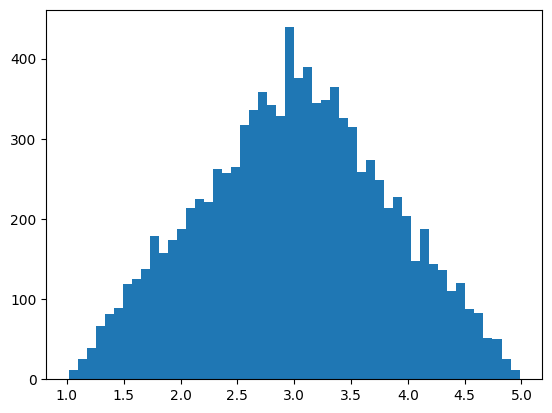

In [20]:
plt.hist(muestra, bins=50)
plt.show()